In [1]:
from auxiliar import get_train_set, plot_roc_curve
from preprocessing import apply_OHE, preprocesado1

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(10, 7))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

<h1>Random Forest</h1>

<h3> Preprocesamiento OHE y Reducción de las columnas Barrio y Religion </h3>

In [3]:
X, y = get_train_set()

In [4]:
X = apply_OHE(preprocesado1(X))
X

,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina,horas_trabajo_registradas,barrio_palermo,categoria_de_trabajo_relacion_de_dependencia,estado_marital_otro,estado_marital_sin_matrimonio,genero_mujer,religion_judaismo,...,trabajo_no_especificado,trabajo_otros,trabajo_profesional_especializado,trabajo_reparador,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas
0,17,39,2174,40,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,50,0,13,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,38,0,40,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,53,0,40,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,28,0,40,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,27,0,38,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,13,40,0,40,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,13,58,0,40,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,13,22,0,20,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2, stratify=y
)

Cosas probadas con el Grid:

    * Entropia/Gini - MXD(10 a 31) -> Entropia, MXD = 15, score: 0.854/0.857
    * Entropia/Gini - MXD(10 a 31) - sqrt/log2 -> Entropia, MDX=15, sqrt, score: 0.8539
    * Entropia/Gini - MXD(12 A 19) - MSL(40 A 46) -> Entropia, MXD=16, MSL=40, score: 0.8483/0.8515
    * Entropia - MXD(13 A 18) - MSL(30 A 41) -> Entropia, MXD = 17, MSL = 30, score: 0.8515, 0.8547
    * Entropia/Gini - MXD(13 A 18) - sqrt/log2, estimadores(1 a 101 - 20) -> Entropia, MXD=15, sqrt, n_est=81, score: 0.8541
    * Entropia, MXD(1 a 11), MSL(40 a 61) -> Entropia, MXD = 10, MSL=41, score: 0.8455
    * Entropia, MXD(5 a 15), MSL(1,101, 10) -> Entropia, MXD=14, MSL=1, score: 0.8546
    * Entropia, MXD(5 a 21), n_est(1, 1001, 50) -> Entropia, MXD=10, n_est = 451, score: 0.8506
    * Entropia, MXD(5 a 16), n_Est(100, 501, 100) -> Entropia, MXD=15, n_est = 200, score = 0.8467
    
    Entropia, sqrt:
        MXD(5, 16):
            50 MSL (fijo), 200EST -> 0.9103 / 0.9046
            100MSL (fijo), 200EST -> 0.9067 / 0.9013
        MXD = 10 (Fijo):
            100 MSL (fijo), 200EST -> 0.9051 / 0.899

In [42]:
#'criterion': ['gini', 'entropy'], 'max_depth': np.arange(5, 6), 'min_samples_leaf': np.arange(35, 46), 'n_estimators': np.arange(1, 1001, 10), 'max_features': ['sqrt']

parameters = {'criterion': ['entropy'], 'max_depth': np.arange(5, 11, 5), 'min_samples_leaf': np.arange(50, 101, 50), 'n_estimators': np.arange(100,301,100)}

clf = RandomForestClassifier(random_state = 0)

gscv = GridSearchCV(
    clf, parameters, scoring='roc_auc', cv=5, return_train_score=True
).fit(X_train, y_train)

In [43]:
print(f"Best score: {gscv.best_score_}")
print(f"Best params {gscv.best_params_}")

Best score: 0.9078824684446241
Best params {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'n_estimators': 200}


In [40]:
rng_frt = gscv.best_estimator_
rng_frt

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=300,
                       random_state=0)

In [41]:
gscv.score(X_test, y_test)

0.9127948247044015

In [ ]:
accuracy_score(y_test, rng_frt.predict(X_test))

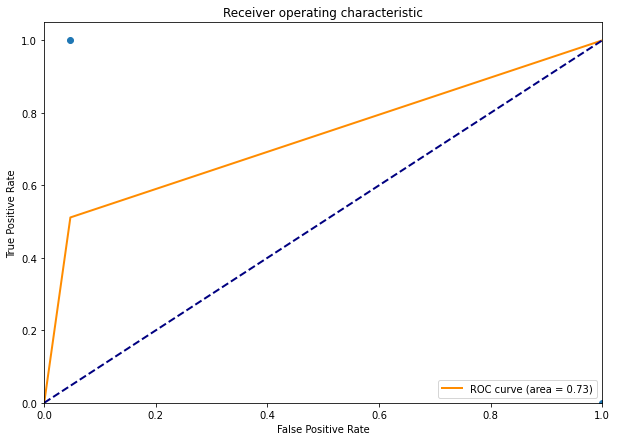

0.7322817574957182

In [25]:
y_pred = rng_frt.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(y_test, y_pred))

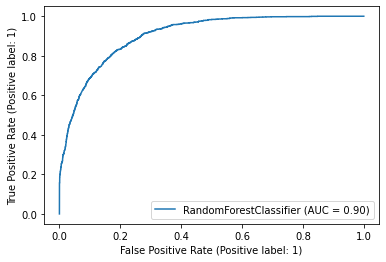

In [26]:
plot_roc_curve(rng_frt, X_test, y_test, response_method="predict_proba")
plt.show()

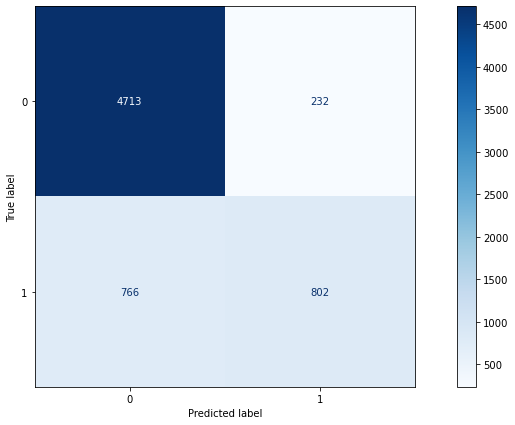

In [27]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    rng_frt, X_test, y_test, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax
)
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4945
           1       0.78      0.51      0.62      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.73      0.76      6513
weighted avg       0.84      0.85      0.83      6513



In [29]:
calibrated_clf = CalibratedClassifierCV(base_estimator=rng_frt, cv="prefit")
calibrated_clf.fit(X_test, y_test)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(criterion='entropy',
                                                             max_depth=15,
                                                             min_samples_leaf=50,
                                                             n_estimators=200,
                                                             random_state=0),
                       cv='prefit')

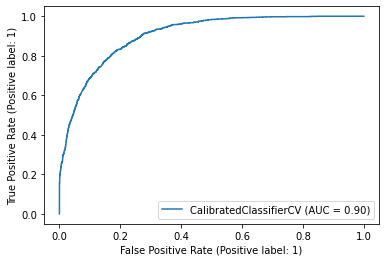

In [30]:
plot_roc_curve(calibrated_clf, X_test, y_test, response_method="predict_proba")
plt.show()

In [31]:
print(f"test score: {calibrated_clf.score(X_test, y_test)}")

test score: 0.8510670965760786


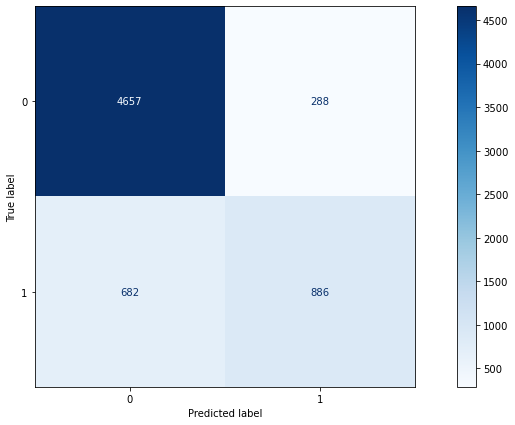

In [32]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    calibrated_clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax
)
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4945
           1       0.78      0.51      0.62      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.73      0.76      6513
weighted avg       0.84      0.85      0.83      6513



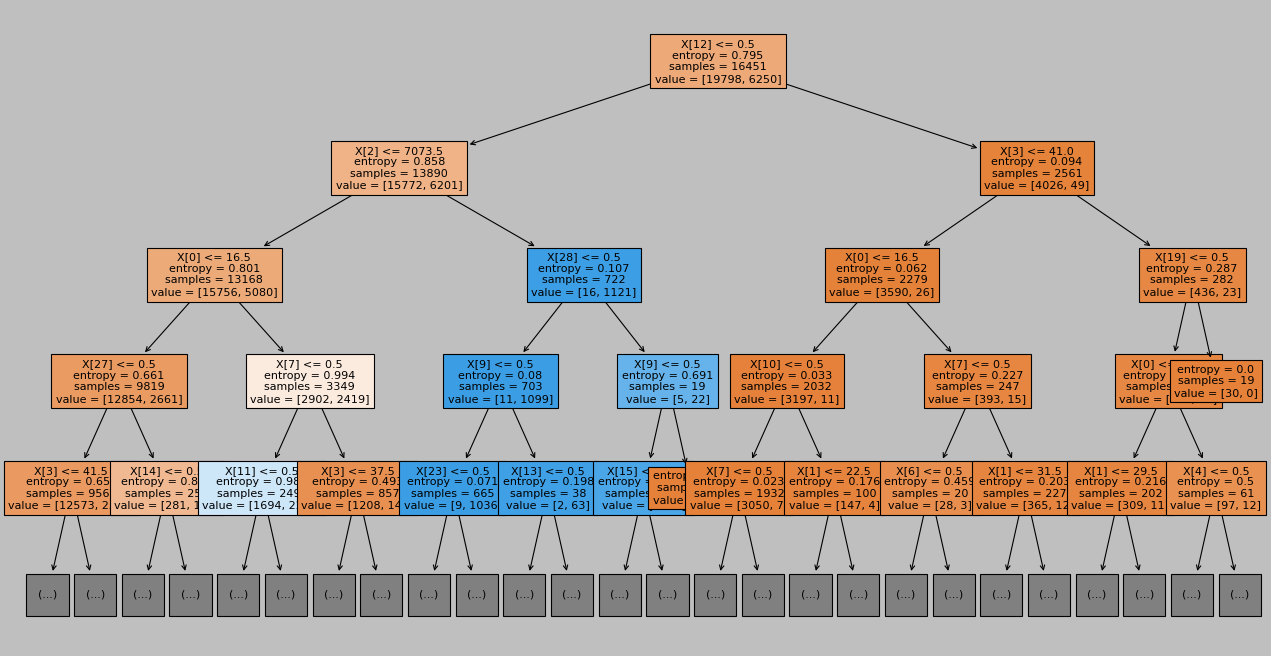

In [19]:
with plt.style.context("classic"):
    plt.figure(figsize=(20, 10))
    plot_tree(rng_frt.estimators_[0], filled=True, fontsize=10, max_depth=4)
    #feature_names=list(X_train.columns)
    plt.savefig('tree_high_dpi', dpi=100)
    #class_names=["no alto V", "alto V"]

## Modelo Final: Entropia, Sqrt, 200 estimadores, 10 MXD, 50 o 100MSL 